# Explicación del Código Streamlit

## Importaciones
```python
import streamlit as st
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
```
- `streamlit`: Diseño de aplicaciones web interactivas.
- `pandas`: Manipulación y análisis de datos.
- `plotly.express`: Creación de gráficos interactivos.
- `wordcloud`: Visualizaciones de frecuencia de palabras.
- `matplotlib.pyplot`: Gráficos estáticos complementarios.

---

## Carga de Datos
```python
@st.cache_data  
def load_data():
    file_path = 'datos_limpios.csv'  
    return pd.read_csv(file_path)  

data = load_data()
```
### Explicación
- **`@st.cache_data`**:
  - Almacena el resultado en caché para evitar recargar datos repetidamente.
  - Mejora el rendimiento de la aplicación.
- **`load_data`**:
  - Carga los datos desde un archivo CSV en un DataFrame de pandas.

---

## Encabezado y Vista Previa de Datos
```python
st.title("Exploración de Datos Interactiva con Filtros Avanzados")
st.subheader("Vista Previa de los Datos")
st.dataframe(data.head())
```
### Explicación
- **`st.title`**:
  - Define el título principal de la aplicación.
- **`st.subheader`**:
  - Introduce una sección descriptiva para la vista previa de los datos.
- **`st.dataframe`**:
  - Muestra una tabla interactiva con las primeras filas del dataset.

---

## Configuración de Filtros

### Filtro por Marca
```python
selected_brands = st.sidebar.multiselect(  
    "Selecciona Marcas",  
    options=data["marca"].unique(),  
    default=data["marca"].unique()  
)
```
#### Explicación
- **`st.sidebar.multiselect`**:
  - Permite seleccionar múltiples marcas en un listado desplegable.
- **Parámetros**:
  - **`"Selecciona Marcas"`**:
    - Etiqueta que describe el filtro.
  - **`options=data["marca"].unique()`**:
    - Proporciona las opciones únicas disponibles en la columna `marca`.
    - **¿Por qué usar `.unique()`?**:
      - Garantiza que cada marca aparezca solo una vez.
  - **`default=data["marca"].unique()`**:
    - Preselecciona todas las marcas por defecto.
    - **¿Por qué?**: Permite que, inicialmente, no haya restricciones en el filtro.

---

### Filtro por Tipo de Producto
```python
selected_types = st.sidebar.multiselect(  
    "Selecciona Tipos de Productos",  
    options=data["tipo"].unique(),  
    default=data["tipo"].unique()  
)
```
#### Explicación
- **`st.sidebar.multiselect`**:
  - Funciona de manera similar al filtro por marca, pero aplica al tipo de producto.
- **Parámetros**:
  - **`"Selecciona Tipos de Productos"`**:
    - Etiqueta que describe este filtro.
  - **`options=data["tipo"].unique()`**:
    - Extrae los valores únicos de la columna `tipo`.
  - **`default=data["tipo"].unique()`**:
    - Preselecciona todos los tipos de productos disponibles.
    - **¿Por qué?**: Facilita que el análisis inicial incluya todos los tipos sin exclusiones.

---

### Filtro por Rango de Precios
```python
price_range = st.sidebar.slider(  
    "Rango de Precios",  
    min_value=int(data["precio"].min()),  
    max_value=int(data["precio"].max()),  
    value=(int(data["precio"].min()), int(data["precio"].max()))  
)
```
#### Explicación
- **`st.sidebar.slider`**:
  - Crea un control deslizante que permite seleccionar un rango continuo de precios.
- **Parámetros**:
  - **`"Rango de Precios"`**:
    - Etiqueta visible del filtro.
  - **`min_value=int(data["precio"].min())`**:
    - Límite inferior basado en el precio mínimo del dataset.
  - **`max_value=int(data["precio"].max())`**:
    - Límite superior basado en el precio máximo del dataset.
  - **`value=(int(data["precio"].min()), int(data["precio"].max()))`**:
    - Define el rango inicial seleccionado (todo el rango disponible).
- **¿Por qué?**:
  - Permite al usuario analizar precios dentro de un intervalo específico, ajustando dinámicamente los resultados.

---

### Filtro por Palabra Clave
```python
keyword = st.sidebar.text_input(  
    "Busca por palabra clave en las descripciones",  
    value=""  
)
```
#### Explicación
- **`st.sidebar.text_input`**:
  - Agrega un campo de texto para que el usuario escriba palabras clave.
- **Parámetros**:
  - **`"Busca por palabra clave en las descripciones"`**:
    - Etiqueta que indica el propósito del filtro.
  - **`value=""`**:
    - Establece el texto inicial como vacío.
- **¿Por qué?**:
  - Ofrece una manera rápida de encontrar productos o registros que contengan palabras específicas en sus descripciones.

---

## Filtrado de Datos
```python
filtered_data = data[  
    (data["marca"].isin(selected_brands)) &  
    (data["tipo"].isin(selected_types)) &  
    (data["precio"] >= price_range[0]) &  
    (data["precio"] <= price_range[1])  
]

if keyword:  
    filtered_data = filtered_data[filtered_data["descripcion"].str.contains(keyword, case=False, na=False)]  
```
### Explicación
- **Filtrado condicional**:
  - Usa `&` para combinar criterios lógicos:
    - `marca` en `selected_brands`.
    - `tipo` en `selected_types`.
    - `precio` dentro del rango seleccionado.
- **Búsqueda por palabra clave**:
  - Aplica `str.contains` para buscar coincidencias textuales en `descripcion`.
  - **`case=False`**:
    - Ignora mayúsculas/minúsculas.



---

## Visualización de Datos Filtrados
```python
st.subheader("Datos Filtrados")
st.write(f"Total de registros filtrados: {len(filtered_data)}")
st.dataframe(filtered_data)
```
### Explicación
- **`st.write`**:
  - Muestra el conteo de registros tras aplicar filtros.
- **`st.dataframe`**:
  - Presenta los resultados en una tabla interactiva.

---

## Visualizaciones
### Distribución de Precios
```python
fig1 = px.histogram(precios, nbins=15, title="Distribución de Precios", labels={'value': 'Precio', 'count': 'Frecuencia'})
st.plotly_chart(fig1)
```
- **Objetivo**: Identificar rangos comunes y valores atípicos.

  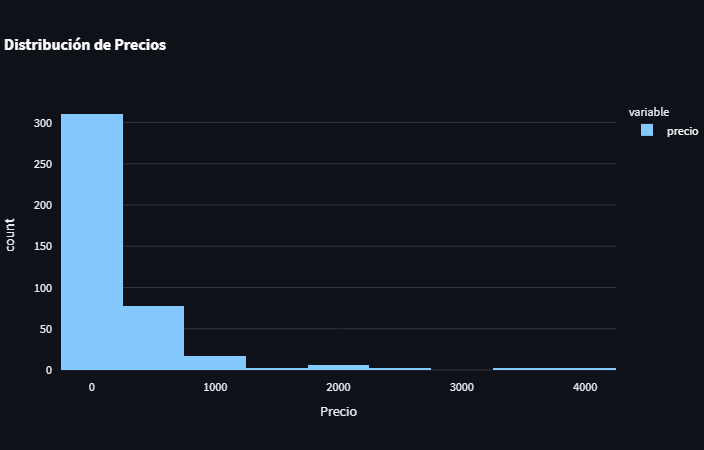
  
1. Distribución de Precios


Insights:

La mayoría de los productos se encuentran en un rango de precios menores a 500 unidades doalres.

Hay algunos productos con precios significativamente altos (outliers) que podrían ser productos premium.

Se recomienda analizar los productos de mayor precio para entender su impacto en la oferta global.



### Productos por Marca
```python
fig2 = px.bar(data['marca'].value_counts().reset_index(), x='index', y='marca',
              title="Productos por Marca", labels={'index': 'Marca', 'marca': 'Cantidad de Productos'})
st.plotly_chart(fig2)
```
- **Objetivo**: Visualizar la cantidad de productos por marca.
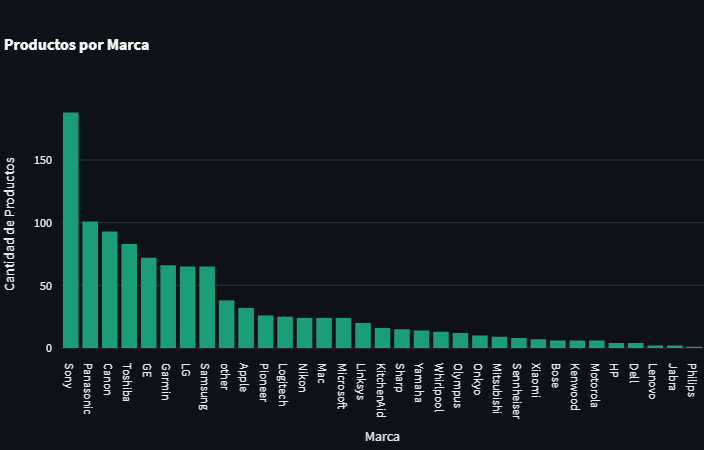

2. Productos por Marca


Insights:

Sony lidera el mercado con una amplia variedad de productos, seguido por Panasonic y Canon.

Las marcas más representadas abarcan una porción significativa del inventario.

Marcas con baja representación podrían indicar productos especializados o menos competitivos.



### Nube de Palabras
```python
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['descripcion'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
st.pyplot(plt)
```
- **Objetivo**: Identificar palabras clave comunes en las descripciones.

  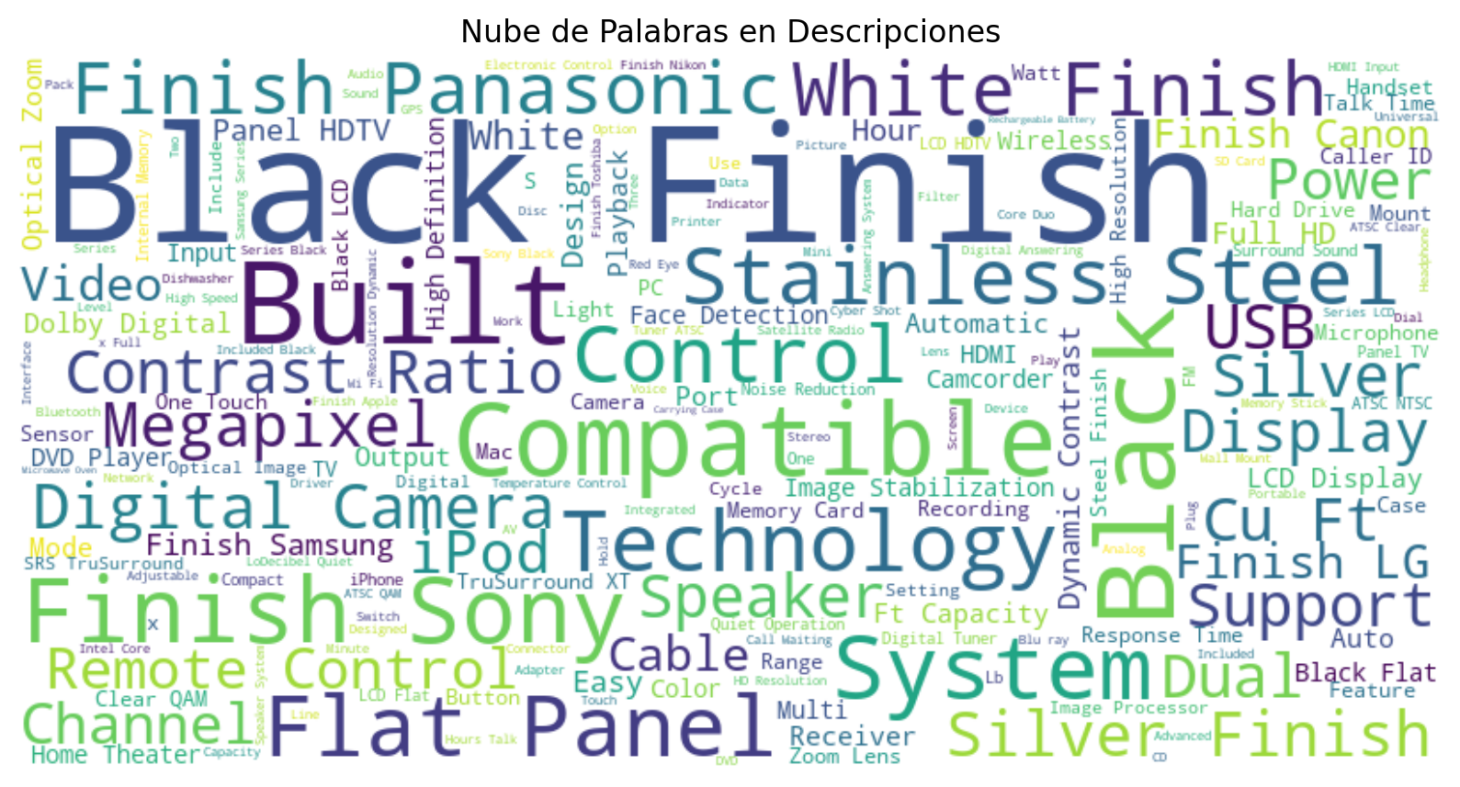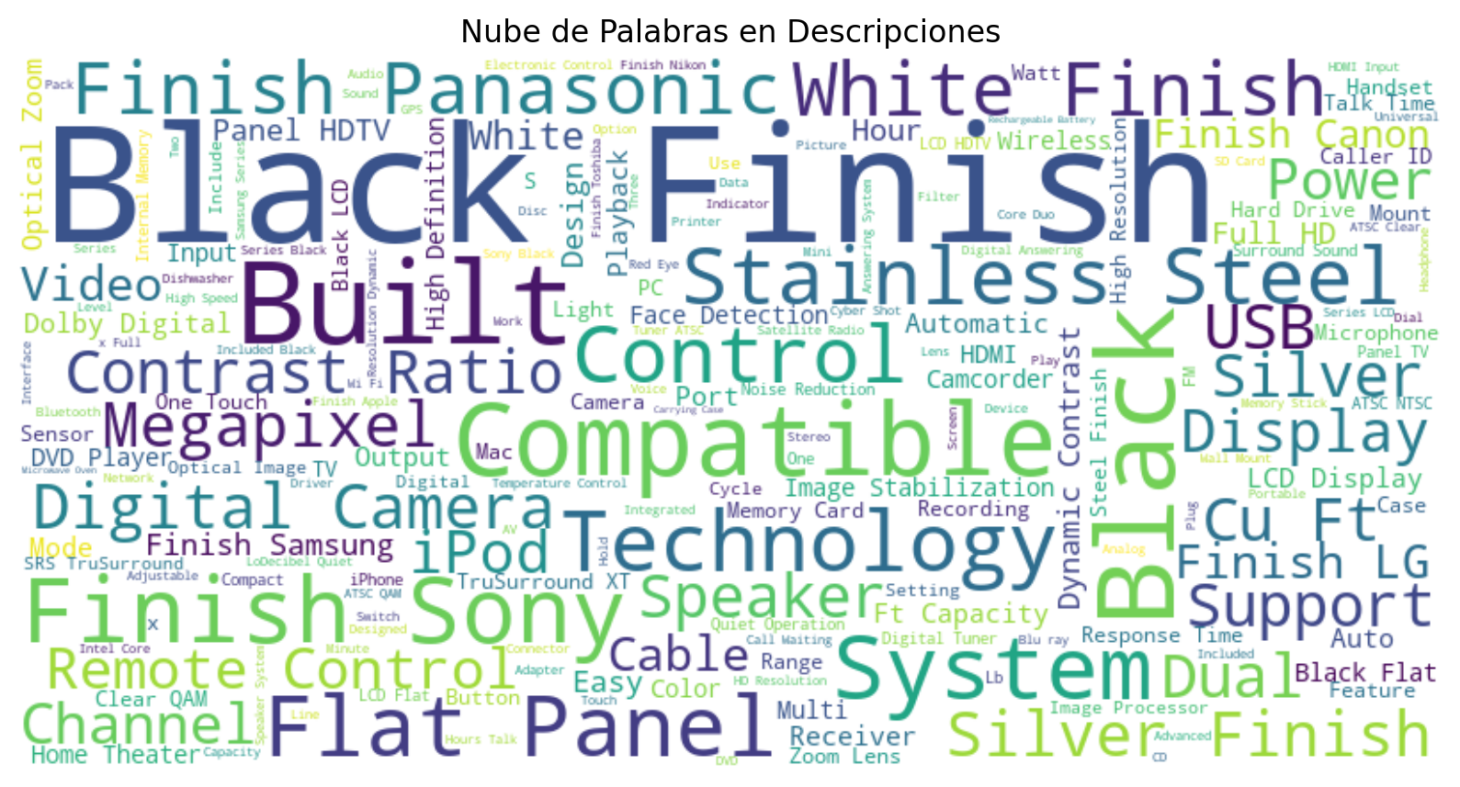

### 3. Nube de Palabras en Descripciones


Insights:

Las palabras más destacadas son "Finish", "Black", "Compatible", lo que sugiere una fuerte presencia de productos con terminaciones modernas y tecnologías compatibles.

Términos como "Digital", "Built" y "Stainless Steel" indican que las características tecnológicas y el diseño son prioritarios para los clientes.

 Se podría mejorar la estrategia de marketing resaltando estas características en las descripciones.
---


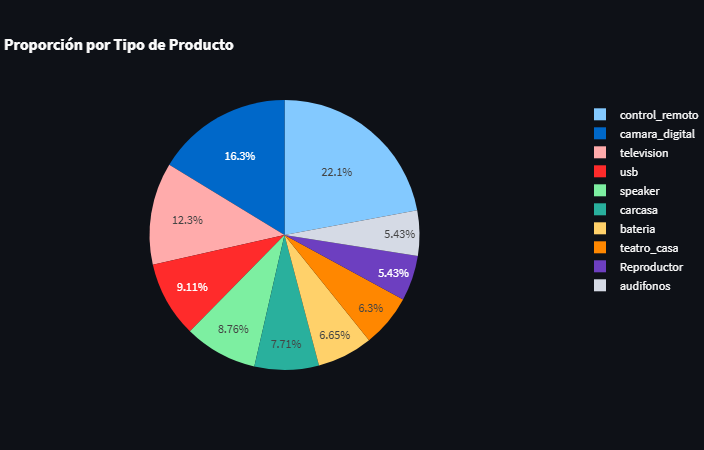


### 4. Proporción por Tipo de Producto


Insights:

Los control remotos (22.1%) y cámaras digitales (16.3%) dominan las categorías.

Las categorías con menor participación, como baterías y adaptadores, podrían representar oportunidades para diversificar el inventario.

Este análisis sugiere un enfoque en los productos de mayor demanda para maximizar ingresos.

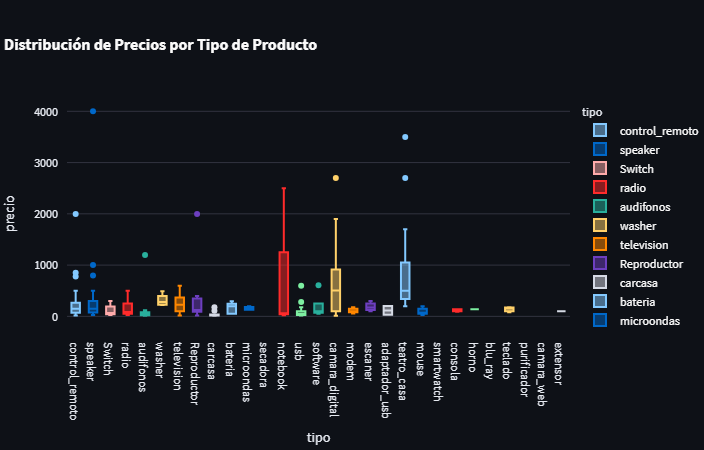


### 5. Distribución de Precios por Tipo de Producto


Insights:

Los precios varían significativamente entre tipos de productos.

Productos como "notebooks" y "teatros en casa" presentan rangos de precios más amplios.

Los "control remotos" y "audífonos" tienen una distribución de precios concentrada, sugiriendo uniformidad en precios.

Se recomienda ajustar estrategias de precios según la categoría para optimizar ventas.

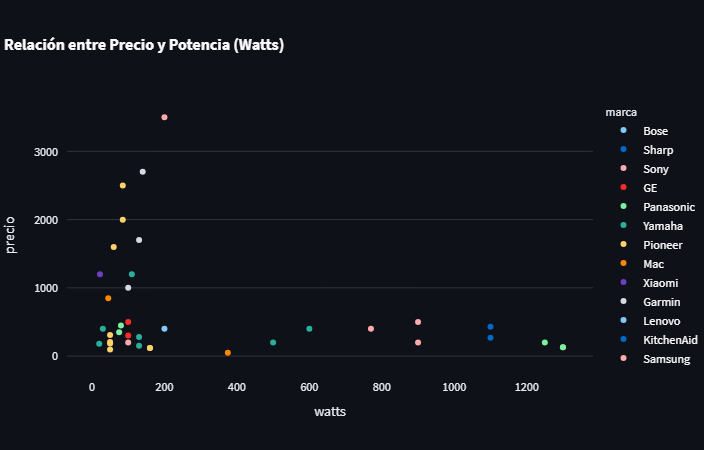
### 6. Relación entre Precio y Potencia (Watts)


Insights:

No se observa una relación lineal clara entre precio y potencia.

Los productos de marcas premium, como Sony y Bose, tienen precios más altos sin depender exclusivamente de la potencia.

Estrategias de venta pueden resaltar otras características para justificar precios elevados.

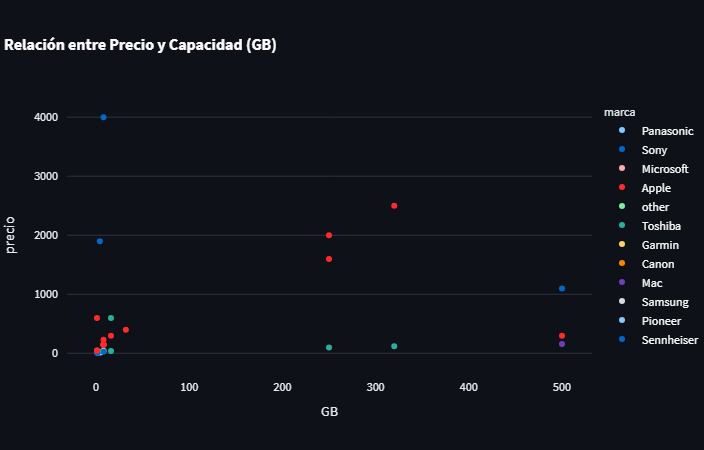
### 7. Relación entre Precio y Capacidad (GB)


Insights:

Los productos de mayor capacidad (GB) no siempre son los más caros, indicando que otros factores afectan el precio.

Es crucial analizar si existe una categoría específica donde la capacidad se alinee mejor con el precio.



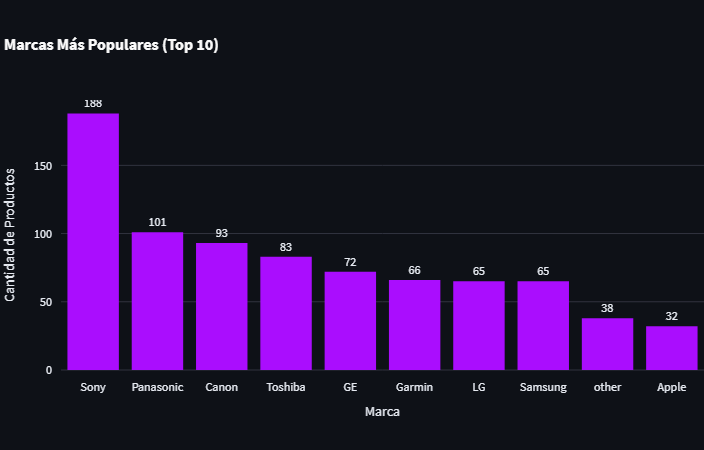
### 8. Marcas Más Populares (Top 10)


Insights:

Sony se destaca como la marca más popular.

Panasonic, Canon y Toshiba también mantienen una fuerte presencia, indicando alta confianza de los clientes.

Estrategias de adquisición y venta podrían centrarse en estas marcas para asegurar el rendimiento.


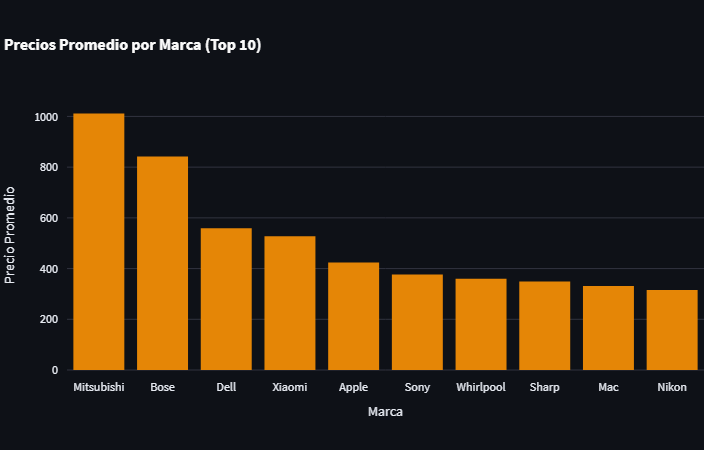
### 9. Precios Promedio por Marca (Top 10)


Insights:

Mitsubishi y Bose presentan los precios promedio más altos, lo que indica una estrategia enfocada en productos premium.

Sony tiene un precio promedio competitivo considerando su alta variedad de productos.

Las marcas con precios bajos podrían capitalizar una estrategia de volumen para aumentar ingresos.

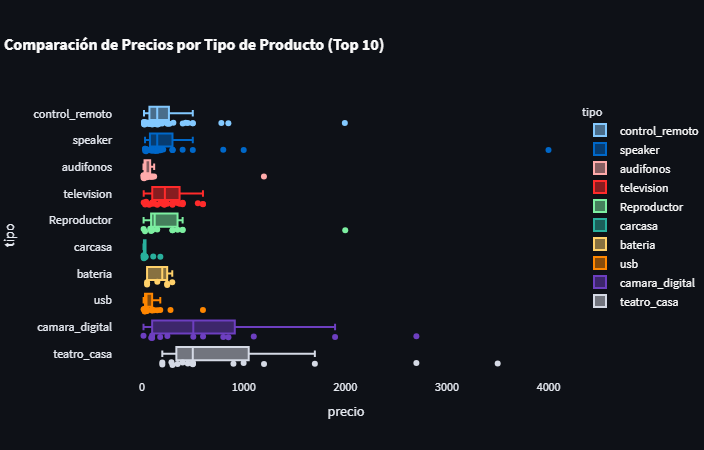
### Comparación de Precios entre Tipos de Productos (Top 10)
Insights para presentación:

- Variabilidad en precios: Los "teatros en casa" y "cámaras digitales" presentan rangos de precios amplios, reflejando una oferta que incluye opciones tanto básicas como premium. Esto puede atraer a diferentes segmentos de clientes.
- Productos con precios concentrados: Tipos como "USBs" y "audífonos" tienen precios más estables, lo cual podría ser indicativo de características estandarizadas o una competencia fuerte en estas categorías.
- Estrategia recomendada: Usar esta variabilidad para posicionar productos premium en categorías amplias como "cámaras digitales", mientras que en productos de precios concentrados, apostar por estrategias de volumen.

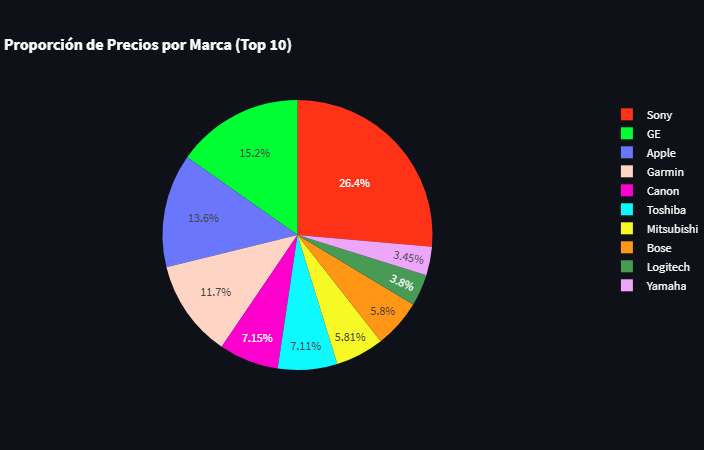
### Proporción de Precios por Marca (Top 10)
Insights para presentación:

- Dominancia de Sony: Sony contribuye con el 26.4% del valor total de los precios en el inventario, consolidando su liderazgo en el mercado y resaltando su capacidad de manejar productos de alta calidad y diversidad.
- Contribución significativa de GE y Canon: GE (15.2%) y Canon (13.6%) también destacan como marcas fuertes, ofreciendo estabilidad al portafolio de productos.
- Estrategia recomendada: Aprovechar el reconocimiento de marca de Sony para continuar impulsando ventas y consolidar alianzas con marcas como GE y Canon para fortalecer el inventario en categorías estratégicas.


## Conclusión
Conclusión General:

El análisis sugiere enfocarse en productos y marcas líderes como Sony y Panasonic.

Las categorías de alto volumen, como control remoto y cámaras digitales, deberían ser prioritarias para estrategias de inventario.

Productos premium, aunque menos frecuentes, tienen un alto impacto en los ingresos totales.

Se recomienda profundizar en el análisis de outliers para entender oportunidades en precios y características de productos.